# EDA: Exploratory Data Analysis
In this notebook we analyse the data and extract a smaller article data from the selected stocks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df = pd.read_csv('/code/data/nasdaq_exteral_data.csv', index_col=0)
df.head()

/tmp/ipykernel_53/1433631666.py:1: DtypeWarning: Columns (3,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/code/data/nasdaq_exteral_data.csv', index_col=0)


,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary
Unnamed: 0,,,,,,,,,,,
0.0,2023-12-16 23:00:00 UTC,Interesting A Put And Call Options For August ...,A,https://www.nasdaq.com/articles/interesting-a-...,NaN,NaN,"Investors in Agilent Technologies, Inc. (Symbo...",Because the $125.00 strike represents an appro...,The current analytical data (including greeks ...,Below is a chart showing the trailing twelve m...,"At Stock Options Channel, our YieldBoost formu..."
1.0,2023-12-12 00:00:00 UTC,Wolfe Research Initiates Coverage of Agilent T...,A,https://www.nasdaq.com/articles/wolfe-research...,NaN,NaN,"Fintel reports that on December 13, 2023, Wolf...","Fintel reports that on December 13, 2023, Wolf...","T. Rowe Price Investment Management holds 10,1...",Agilent Technologies Declares $0.24 Dividend O...,The projected annual revenue for Agilent Techn...
2.0,2023-12-12 00:00:00 UTC,Agilent Technologies Reaches Analyst Target Price,A,https://www.nasdaq.com/articles/agilent-techno...,NaN,NaN,"In recent trading, shares of Agilent Technolog...","In recent trading, shares of Agilent Technolog...","In recent trading, shares of Agilent Technolog...",When a stock reaches the target an analyst has...,When a stock reaches the target an analyst has...
3.0,2023-12-07 00:00:00 UTC,Agilent (A) Enhances BioTek Cytation C10 With ...,A,https://www.nasdaq.com/articles/agilent-a-enha...,NaN,NaN,Agilent Technologies A is enhancing its BioTek...,"Per a Grand View Research report, the global m...","Notably, Agilent enhanced the BioTek Cytation ...","Agilent Technologies, Inc. Price and Consensus...","Notably, Agilent enhanced the BioTek Cytation ..."
4.0,2023-12-07 00:00:00 UTC,"Pre-Market Most Active for Dec 7, 2023 : SQQQ,...",A,https://www.nasdaq.com/articles/pre-market-mos...,NaN,NaN,The NASDAQ 100 Pre-Market Indicator is up 70.2...,ProShares UltraPro Short QQQ (SQQQ) is -0.15 a...,"As reported by Zacks, the current mean recomme...","The total Pre-Market volume is currently 39,23...",The NASDAQ 100 Pre-Market Indicator is up 70.2...


## Extract the data from the chosen tickers

In [118]:
tickers = ['GOOG', 'V', 'BRK', 'GE', 'XOM']

In [119]:
stock_datas = []

for ticker in tickers:
    stock_data = df[df['Stock_symbol'] == ticker]
    stock_data = stock_data[~stock_data['Article'].isna()]
    stock_datas.append(stock_data)
    
    print(f'Extracted {ticker} with {len(stock_data)} rows')

ext_df = pd.concat(stock_datas, axis=0)
ext_df = ext_df.reset_index(drop=True)
ext_df.tail()

Extracted GOOG with 8726 rows
Extracted V with 6945 rows
Extracted BRK with 8797 rows
Extracted GE with 8680 rows
Extracted XOM with 6757 rows


,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary
39900,2019-08-26 00:00:00 UTC,Why Debt is a Bigger Problem for ExxonMobil Th...,XOM,https://www.nasdaq.com/articles/why-debt-is-a-...,NaN,NaN,ExxonMobil (NYSE: XOM) used to be one of the m...,ExxonMobil (NYSE: XOM) used to be one of the m...,ExxonMobil (NYSE: XOM) used to be one of the m...,ExxonMobil (NYSE: XOM) used to be one of the m...,ExxonMobil (NYSE: XOM) used to be one of the m...
39901,2019-08-26 00:00:00 UTC,7 High-Yielding Dividend Stocks to Buy for the...,XOM,https://www.nasdaq.com/articles/7-high-yieldin...,NaN,NaN,When the United States Federal Reserve ended i...,Exxon Mobil (XOM) Source: Jonathan Weiss / Shu...,Exxon Mobil (XOM) Source: Jonathan Weiss / Shu...,Exxon Mobil (XOM) Source: Jonathan Weiss / Shu...,Exxon Mobil (XOM) Source: Jonathan Weiss / Shu...
39902,2019-08-26 00:00:00 UTC,Don’t Count on High Returns With Exxon Mobil,XOM,https://www.nasdaq.com/articles/dont-count-on-...,NaN,NaN,Exxon Mobil (NYSE:) stock needs something to m...,"But in the long term, could investors see a ma...",XOM Stock Valuation Exxon Mobil stock continue...,XOM Stock Valuation Exxon Mobil stock continue...,"But in the long term, could investors see a ma..."
39903,2019-08-26 00:00:00 UTC,"Energy Sector Update for 08/26/2019: HUSA, SRC...",XOM,https://www.nasdaq.com/articles/energy-sector-...,NaN,NaN,Top Energy Stocks:\nXOM: +1.26%\nCVX: +0.70%\n...,The global benchmark Brent crude October contr...,Top Energy Stocks: The global benchmark Brent ...,"Among energy-related ETFs, the United States O...",Top Energy Stocks: The global benchmark Brent ...
39904,2019-08-25 00:00:00 UTC,Danger Lurks for These 2 High-Yield Dividend S...,XOM,https://www.nasdaq.com/articles/danger-lurks-f...,NaN,NaN,Energy companies have a spotty history when it...,"In addition to that, Summit recently formed a ...","In addition to that, Summit recently formed a ...","In addition to that, Summit recently formed a ...","In addition to that, Summit recently formed a ..."


### Save the extracted dataset

In [7]:
ext_df.to_csv('/code/data/extracted_data.csv', index=False)

### Read it back in case of running the notebook from this point

In [8]:
ext_df = pd.read_csv('/code/data/extracted_data.csv')

In [9]:
ext_df['Date'] = ext_df['Date'].apply(pd.to_datetime)

In [10]:
ext_df.tail()

,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary
6940,2010-04-28 00:00:00+00:00,"Market Wrap-Up for Apr.28 (DOW, PFCB, GS, STI,...",V,https://www.nasdaq.com/articles/market-wrap-ap...,NaN,NaN,We saw the markets hold up fairly steady today...,We saw the markets hold up fairly steady today...,"Volume pulled off the levels we saw yesterday,...",We saw the markets hold up fairly steady today...,We saw the markets hold up fairly steady today...
6941,2010-04-21 00:00:00+00:00,Visa to Buy Payments Processor CyberSource for...,V,https://www.nasdaq.com/articles/visa-buy-payme...,NaN,NaN,Credit card issuer Visa Inc. ( V ) announced W...,"Visa will pay $26 per share for CyberSource, w...",The deal is expected to close in the fourth qu...,Credit card issuer Visa Inc. ( V ) announced W...,The two companies have been partners in proces...
6942,2010-04-19 00:00:00+00:00,Visa’s Price Target Raised at UBS (V),V,https://www.nasdaq.com/articles/visas-price-ta...,NaN,NaN,Credit card issuer Visa Inc. ( V ) saw its pri...,Credit card issuer Visa Inc. ( V ) saw its pri...,"The company has a .53% dividend yield, based o...",The Bottom Line We have been recommending shar...,"The analyst said it now expects Visa shares, w..."
6943,2010-04-16 00:00:00+00:00,Visa Coverage Started at FBR Capital with an “...,V,https://www.nasdaq.com/articles/visa-coverage-...,NaN,NaN,Credit card giant Visa Inc. ( V ) saw its cove...,Credit card giant Visa Inc. ( V ) saw its cove...,"The company has a .53% dividend yield, based o...","FBR Capital noted that ""…we expect that [Visa'...",The Bottom Line We have been recommending shar...
6944,2010-04-15 00:00:00+00:00,Stocks to Buy and Sell: Ratings for the Top 50...,V,https://www.nasdaq.com/articles/stocks-buy-and...,NaN,NaN,"We are seeing a ""tech renaissance"" right now, ...",My proprietary Portfolio Grader stock-ranking ...,My proprietary Portfolio Grader stock-ranking ...,"Related Articles: Stock Downgrades: BAC, BA, P...",My proprietary Portfolio Grader stock-ranking ...


## Get the context lengths of the articles
A token is around 0.75*word

In [124]:
tickers = list(ext_df['Stock_symbol'].unique())

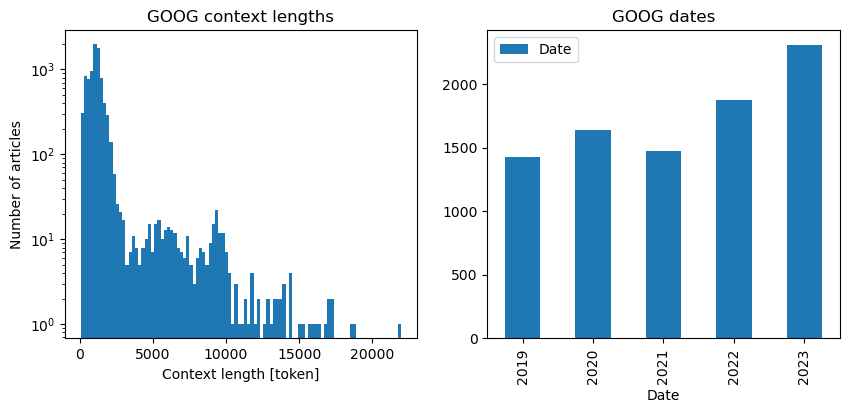

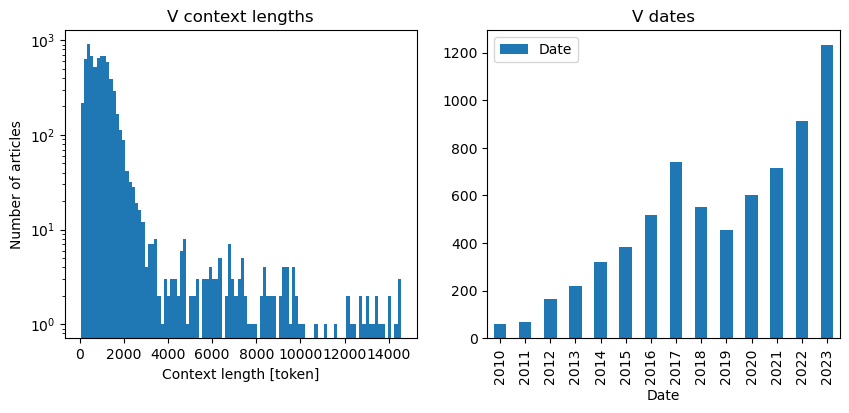

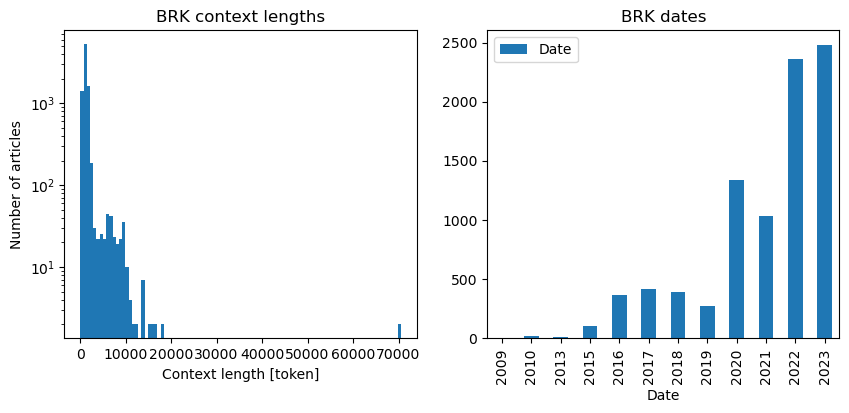

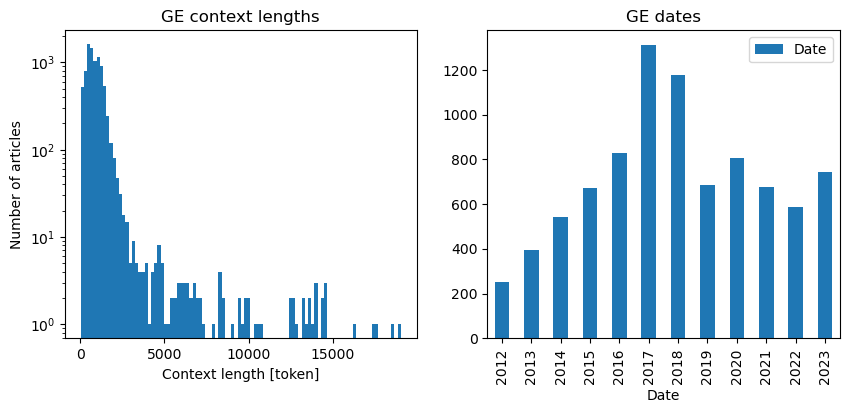

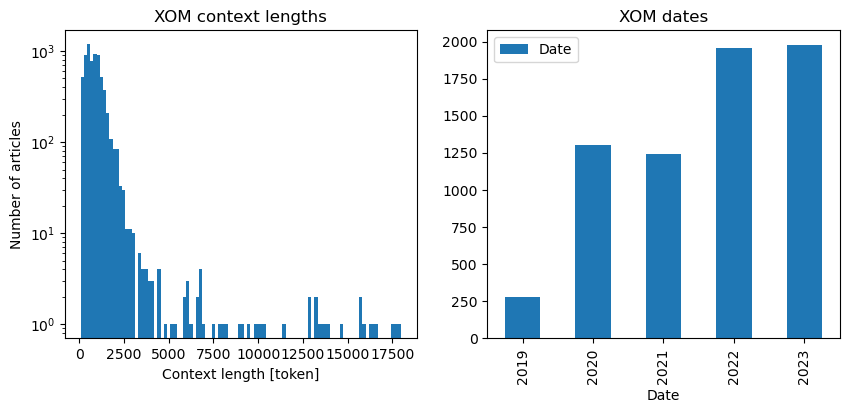

In [125]:
for ticker in tickers:
    token_numbers = ext_df[ext_df['Stock_symbol'] == ticker].apply(lambda x: len(x['Article'].replace('.!?:-',' ').split(' '))/0.75, axis=1)
    dates = ext_df[ext_df['Stock_symbol'] == ticker].Date.to_frame()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    ax1.hist(token_numbers, bins=100)
    ax1.set_yscale('log')
    ax1.set_title(f'{ticker} context lengths')
    ax1.set_xlabel('Context length [token]')
    ax1.set_ylabel('Number of articles')
    
    dates.groupby([dates["Date"].dt.year]).count().plot(kind="bar", ax=ax2)
    ax2.set_title(f'{ticker} dates')